In [4]:
import numpy as np
from uavsar_pytools.convert.tiff_conversion import read_annotation
import matplotlib.pyplot as plt

In [5]:
f = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc'
desc = read_annotation('/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_20005_003_200212_L090HH_01_BU.ann')

In [6]:
spacing = '1x1'
bs = desc['slc bytes per pixel']['value']
nrows = desc[f'slc_1_{spacing} rows']['value']
ncols = desc[f'slc_1_{spacing} columns']['value']
dtype = desc['slc pixel format']['value']

In [7]:
slc = np.fromfile(f, dtype = np.complex64).reshape(nrows, ncols)

In [9]:
slc.imag

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.22433151, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.03915237, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.13021134, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [1]:
from geolocate import geolocate_uavsar

/Users/zachkeskinen/miniconda3/envs/gdal/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
geolocate_uavsar(in_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc',
ann_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_20005_003_200212_L090HH_01_BU.ann', 
out_dir = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase', 
llh_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_01_BU_s1_2x8.llh')

/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/tmp/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc.real.vrt
/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/tmp/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc.imag.vrt


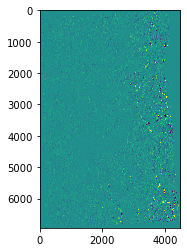

In [ ]:
import rasterio as rio
import matplotlib.pyplot as plt
with rio.open('/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc.real.tif') as src:
    arr = src.read(1)
plt.imshow(arr, vmin = -.1, vmax = .1)